In [2]:
import pandas as pd 
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.sparse.linalg import svds
from scipy import sparse
import seaborn as sns

In [3]:
# !pip install seaborn

In [4]:
filepath = './yelp.edgelist'
data = pd.read_csv(filepath, sep=' ',header = None,names = ["用户id","饭店id","权重"]) # 制表符分隔tab  
data

,用户id,饭店id,权重
0,0,0,1
1,0,198,1
2,0,11036,1
3,0,40573,1
4,0,81,1
...,...,...,...
2601672,686551,85538,1
2601673,686552,85538,1
2601674,686553,85538,1
2601675,686554,85538,1


In [5]:
G = nx.DiGraph()
G.add_weighted_edges_from([tuple(x) for x in data.values])

In [6]:
# G2=nx.betweenness_centrality(G,k=2)
# nx.draw_networkx(G2)
# plt.show()
print (G.number_of_edges())

2601677


In [7]:
#
yelp = np.array(data)
yelp_row = yelp[:,0] # 行索引
yelp_col = yelp[:,1] # 列索引
yelp_data= yelp[:,2] # 索引对应的数值
yelp_matrix = sparse.coo_matrix((yelp_data, (yelp_row, yelp_col)), dtype=float) # 需要转化为f
print(yelp_matrix.shape)
print(type(yelp_matrix))
u, s, vt = svds(yelp_matrix,k=10,which = 'LM')

(686556, 85539)
<class 'scipy.sparse.coo.coo_matrix'>


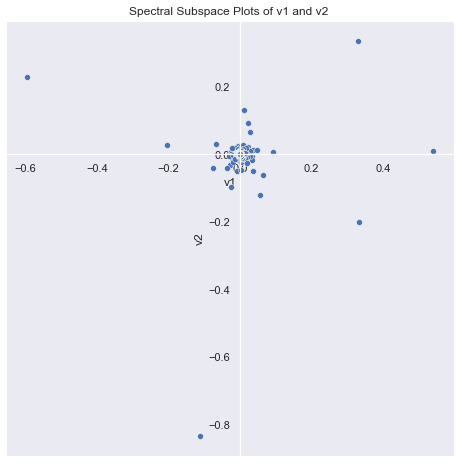

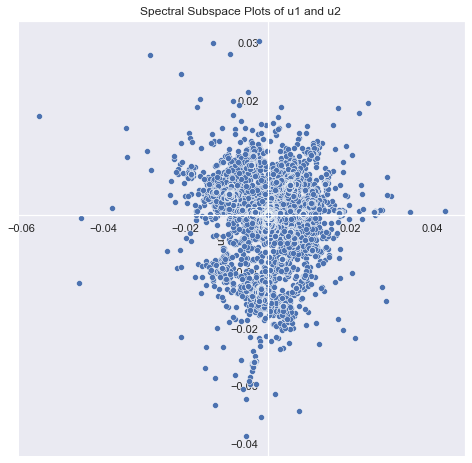

In [11]:
# Spectral Subspace Plots
def GetMatrixImage(root,vt,vt_name):
    sns.set(style="dark") 
    for i in range(len(vt)-1):
        fig = plt.figure(figsize=(8, 8))
        ax = plt.axes()
        # ax.set_xticks([]) 
        # ax.set_yticks([])
        # ax.set_xlabel('v1') 
        # ax.spines['top'].set_color('none')
        # ax.spines['right'].set_color('none')
        # ax.xaxis.set_ticks_position('bottom')

        ax.spines['bottom'].set_position(('data', 0))
        ax.spines['left'].set_position(('data', 0))

        
        g = sns.scatterplot( x="v{}".format(i+1), y="v{}".format(i+2),data=pd.DataFrame({
            "v{}".format(i+1):vt[i],
            "v{}".format(i+2):vt[i+1]
        }),palette="Set2")
        img_title = "Spectral Subspace Plots of {0}{1} and {0}{2} ".format(vt_name,i+1,i+2)
        g.set_title(img_title)
        ax.set_xlabel(vt_name+str(i+1))
        ax.set_ylabel(vt_name+str(i+2))

        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,
                    height + 3,
                    '{:1.2f}%'.format(100*height/len(vt)),
                    ha="center") 
        
        plt.savefig(root + img_title + '.jpg')
        break
        plt.show()
GetMatrixImage('img/',vt,'v')
GetMatrixImage('img/',u.T,'u')

In [ ]:
help(ax.spines['bottom'].set_position)
help(ax.text)

Help on method set_position in module matplotlib.spines:

set_position(position) method of matplotlib.spines.Spine instance
    Set the position of the spine.
    
    Spine position is specified by a 2 tuple of (position type,
    amount). The position types are:
    
    * 'outward': place the spine out from the data area by the specified
      number of points. (Negative values place the spine inwards.)
    * 'axes': place the spine at the specified Axes coordinate (0 to 1).
    * 'data': place the spine at the specified data coordinate.
    
    Additionally, shorthand notations define a special positions:
    
    * 'center' -> ('axes', 0.5)
    * 'zero' -> ('data', 0.0)

Help on method text in module matplotlib.axes._axes:

text(x, y, s, fontdict=None, **kwargs) method of matplotlib.axes._subplots.AxesSubplot instance
    Add text to the axes.
    
    Add the text *s* to the axes at location *x*, *y* in data coordinates.
    
    Parameters
    ----------
    x, y : float
      